<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Naive Bayes Practice



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

## Load the breast cancer data

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data
y = data.target

## Do a train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fit a naive Bayes model

Which type might be appropriate?

In [6]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))

0.9340659340659341
0.9296703296703296
0.9473684210526315


## Check the distribution of your features

This should inform you which Naive Bayes type you will need.

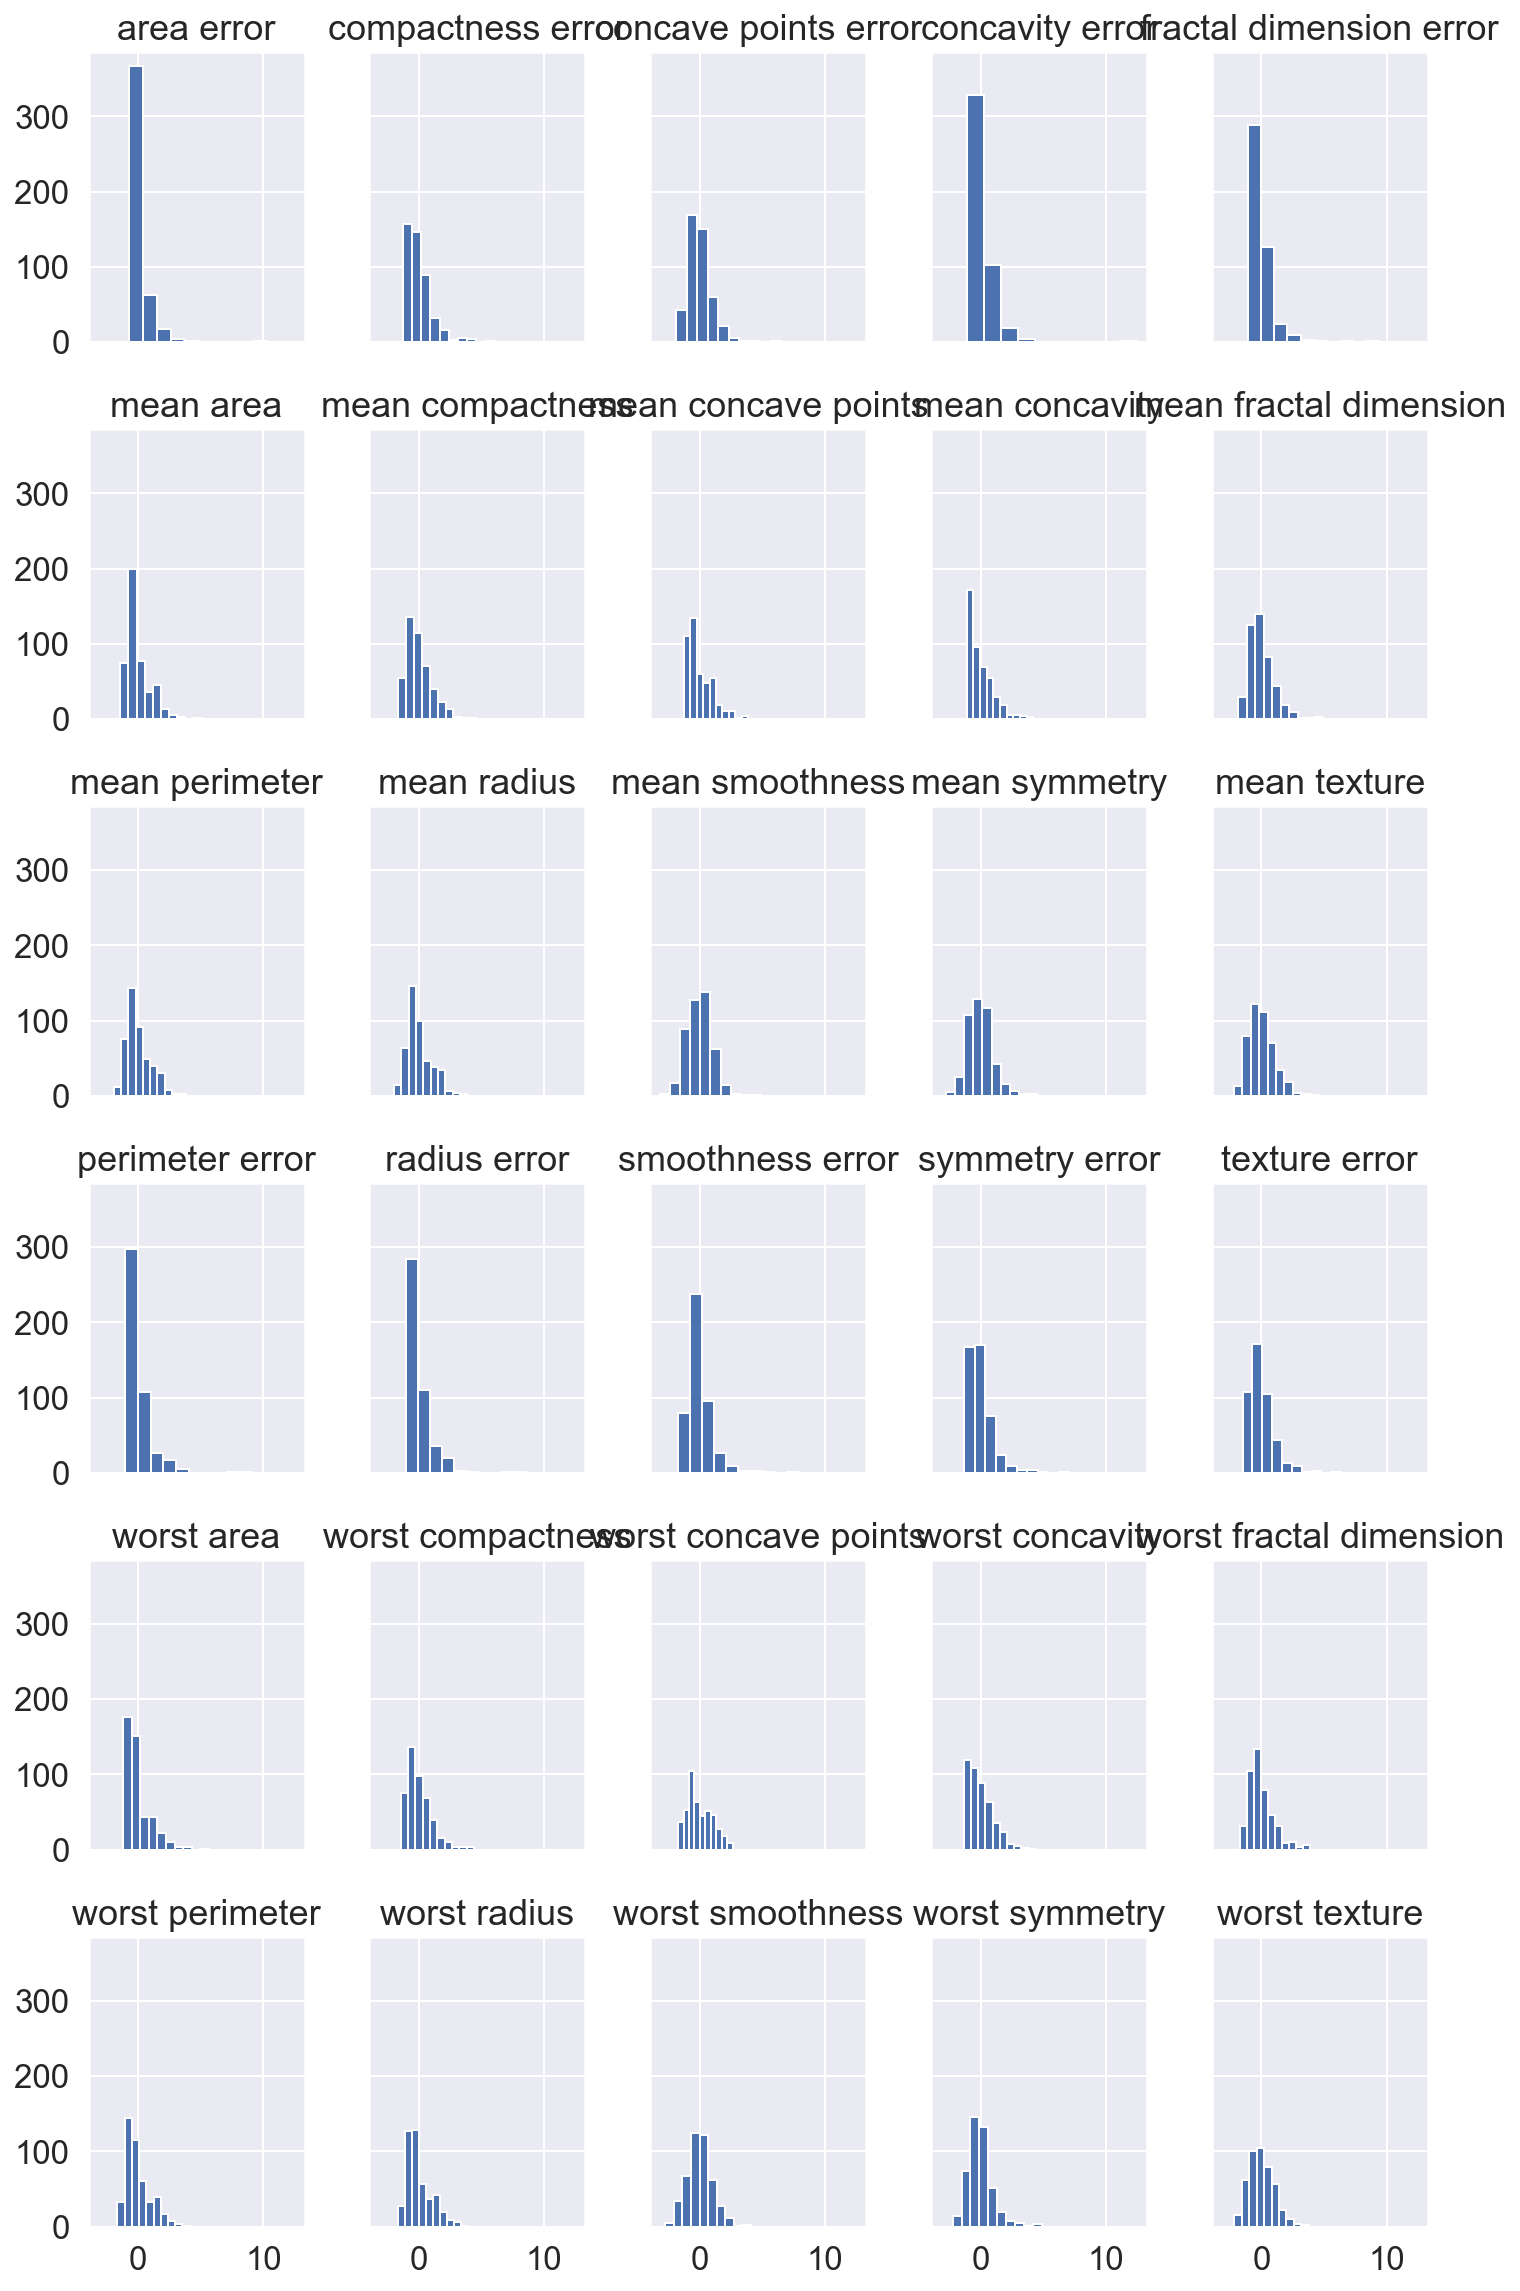

In [7]:
pd.DataFrame(X_train, columns=data.feature_names).hist(figsize=(12,20), sharex=True, sharey=True)
plt.show()

## Use the power transformer to obtain more normally distributed features

- [Scikit-Learn Power Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)

In [8]:
from sklearn.preprocessing import PowerTransformer

In [9]:
power = PowerTransformer()
X_trainp = power.fit_transform(X_train)
X_testp = power.transform(X_test)

In [10]:
power.lambdas_

array([ 0.40838757,  0.62186971,  0.37374798, -0.00224819,  0.83639928,
        0.34940915,  0.02433256,  0.1376792 ,  0.68901736,  0.39747218,
       -0.32448105,  0.25653971, -0.37084887, -1.07781812,  0.08350116,
       -0.0259369 , -0.04821504,  0.50044072,  0.01357313, -0.30560174,
        0.21696959,  0.6930751 ,  0.20962363, -0.25163709,  0.85299302,
        0.23801156,  0.35800709,  0.63823039,  0.52307955,  0.32614472])

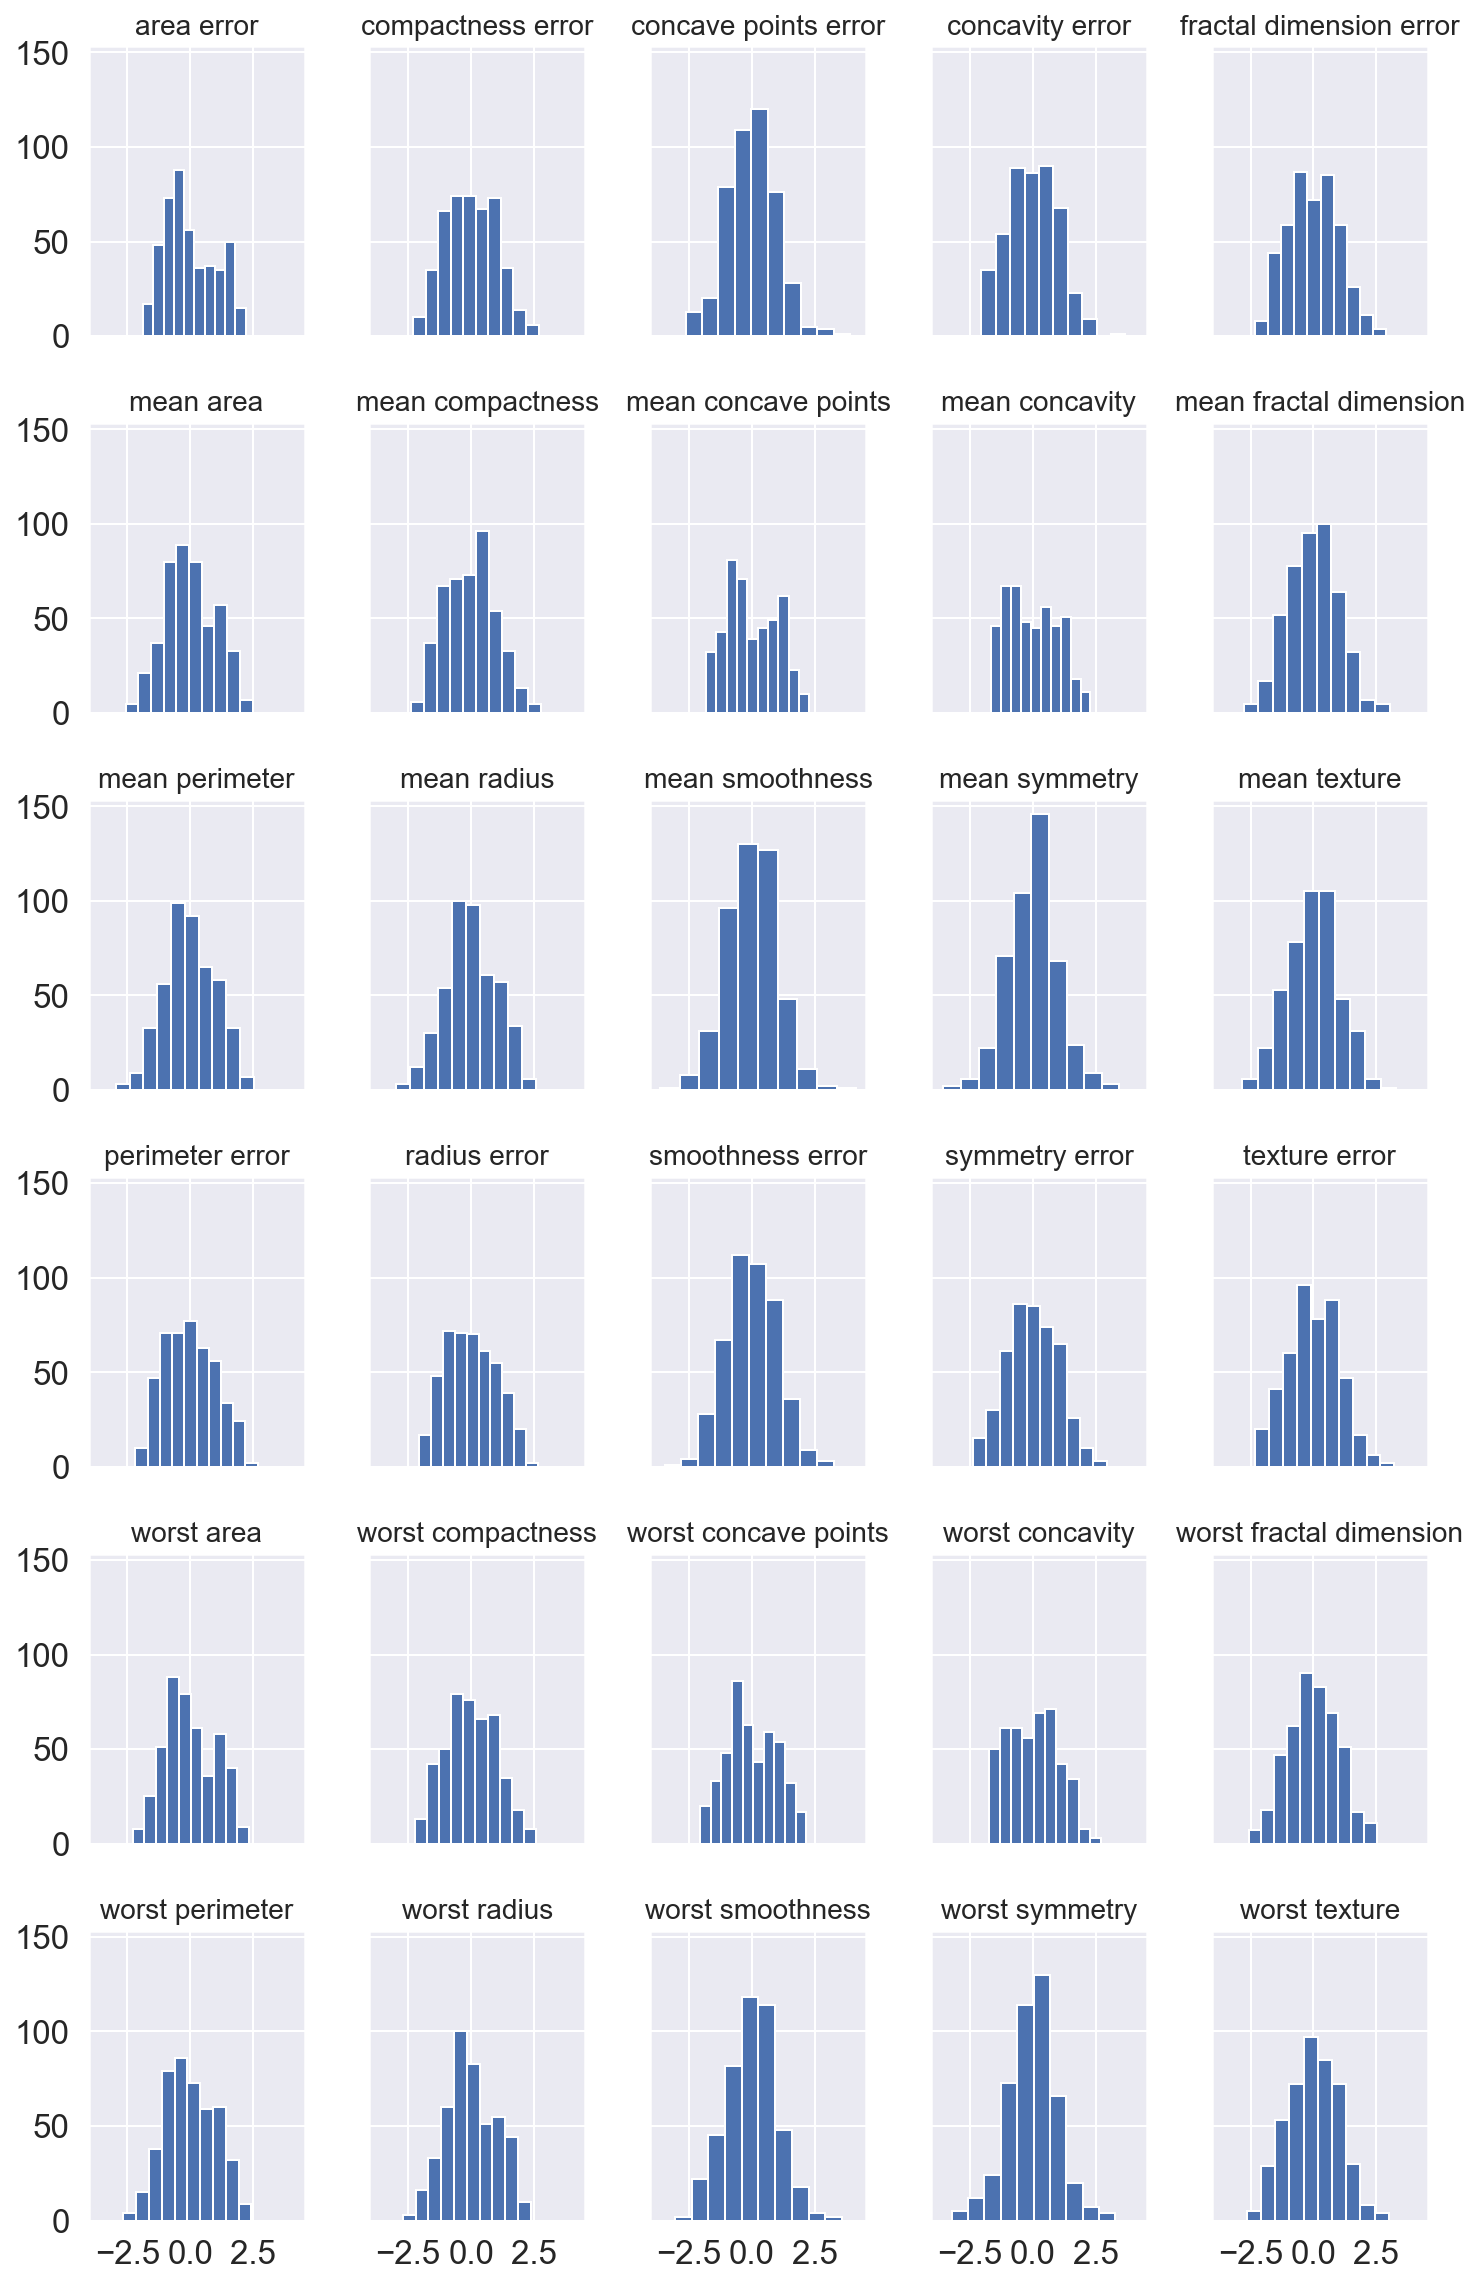

In [11]:
axes = pd.DataFrame(X_trainp, columns=data.feature_names).hist(figsize=(12,20), sharex=True, sharey=True)
for ax in axes:
    for a in ax:
        a.set_title(a.get_title(), fontsize=14)
plt.show()

## Fit the model on the transformed features

In [12]:
model = naive_bayes.GaussianNB()
model.fit(X_trainp, y_train)

print(model.score(X_trainp, y_train))
print(cross_val_score(model, X_trainp, y_train, cv=5).mean())
print(model.score(X_testp, y_test))

0.9516483516483516
0.9494505494505494
0.9385964912280702
